<a href="https://colab.research.google.com/github/ntj/public-docs/blob/main/Kopie_von_Zahlen_mit_dem_MNIST_Dataset_klassifizieren.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Hallo

In diesem Dokument wollen wir uns mit dem Erstellen und Trainieren eines einfachen künstlichen neuronalen Netzes beschäftigen. Wir benutzen dazu das MNIST Dataset für handschriftliche Ziffern. 
 

## Funktionsweise

Als erstes klären wir, wie du mit diesem Notebook arbeitest. Das Notebook besteht aus Zellen, die unterschiedliche Typen haben. Einerseits wären das die **Textzellen** (das sind die, wo der ganze Erklärtext drin steht, wie hier zum Beispiel) und **Codezellen**. Die Codezellen sind der spannende Teil. Programmiert wird in Python, du solltest dich dafür am besten schon etwas auskennen.

Um Code in den einzelnen Codezellen **auszuführen**, klicke in die Zelle und anschließend auf auf den kleinen Pfeil links von der Zelle. Alternativ kannst auch die Tastenkombination ```STRG + Enter``` nutzen. Probiere es gleich mal aus, indem du die Bibliotheken importierst, die wir für unser Projekt benötigen. Dazu musst du nur die nächste Codezelle ausführen.

`HINWEIS:` Beim ersten Ausführen kann eine Warnmeldung von Google Colab erscheinen, die ist nicht schlimm.

In der Codezelle sollte anschließend links eine kleine `[1]` erscheinen. Das heißt, dein Code wurde ausgeführt. Die Zahl steht dafür in welcher Reihenfolge die einzelnen Zellen ausgeführt wurden. 

In [ ]:
#das sind die Bibliotheken die wir für das Erstellen und Trainieren benötigen
import tensorflow as tf
from tensorflow import keras
import numpy

#die Bibliotheken hier sind nur für die Visualisierung und Interaktivität des Notebooks nötig
import matplotlib as mplt
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import Button, Layout, Checkbox, Box, Textarea, Text, VBox, HTML
from google.colab import output

Für unser Projekt benutzen wie die Bibliotheken **Tensorflow** und das darin enthaltene **Keras**. Keras ist eine der führende (Python-) Bibliotheken um *Machine Learning* Projekte umzusetzen und wird von Wissenschaftlern und Ingenieuren in der ganzen Welt eingesetzt! Trotz dessen ist die Verwendung dieser *relativ* einfach, sodass wir einen Einblick in die Welt der Data Scientists wagen können! Aber ich schweife ab, wir sind ja noch bei der Bedienung.  



Manchmal wirst du Codezellen sehen, in denen der Code versteckt ist. Dann liegt das daran, dass das Zellen sind die interaktiven Content für diese Seite generieren und nicht Teil des Programmierprojekts sind. Um solche Zellen auszuführen, klicke auch hier auf den kleinen Pfeil.

In [ ]:
#@title
print('Hey, hey, hey. Super!')

Hey, hey, hey. Super!


Diese Zellen immer einfach ausführen, damit die Tipps und Hinweise dahinter auch funktionieren.

Ansonsten bleibt mir nicht mehr zu sagen, lass uns anfangen!

# 1. Daten sammeln

Bevor wir überhaupt darüber nachdenken können, ein Machine Learning Modell zu erstellen, brauchen wir erst einmal Daten. Der Prozess des Datensammelns ist mindestens so komplex wie das Arbeiten mit diesen. Zum Glück können wir auf den standardisierten Datensatz MNIST zurückgreifen! Dieser wird in Keras bereits mitgeliefert. Laden wir uns erst einmal die Daten herunter.

In [ ]:
mnist = tf.keras.datasets.mnist
(trainZiffernBilder,trainZiffernLabels),(testZiffernBilder,testZiffernLabels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


Ok, anscheinend gibt die Funktion `mnist.load_data()`den Datensatz zurück, doch was bedeutet der Ausdruck davor? Schauen wir uns dafür einmal die Daten genauer an.

In [ ]:
print(trainZiffernBilder[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

Huch! Da ist ja gar kein Bild, sondern nur eine ganze Menge Zahlen. Woran liegt das?

Die Daten sind als ein **Tensor** gespeichert. Ein Tensor ist ein multidimensionales Array. Während man ein eindimensionales Array eine Liste nennen könnte und ein zweidimensionales Array eine Art Tabelle ist, kann ein Tensor sogar noch mehr Dimensionen haben. Die Inhalte unseres Tensors sind dreidimensional. Wenn man sich die Werte genauer anschaut, erkennt man, dass diese zwischen 0 und 255 liegen. Was könnte das bedeuten? 

Die zwei Dimensionen könnten die Länge und Breite unseres Bildes sein. Die Werte sind dann wahrscheinlich die Farbwerte jedes Pixels. Wandeln wir also die Einträge in Bilder um! Führe dazu den Code hier drunter aus. Falls es dich interessiert, kannst du ihn dir auch anschauen, aber für das Trainieren des Netzes ist er nicht wichtig. 

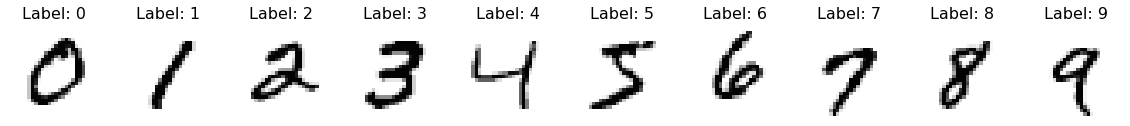

In [ ]:
#@title
f, ax = plt.subplots(1, 10, figsize=(20,20))
for i in range (0,10):
    sample = trainZiffernBilder[trainZiffernLabels == i][0]
    ax[i].imshow(sample, cmap='Greys') #gray
    ax[i].set_title('Label: {}'.format(i),fontsize=16)
    ax[i].axis('off')

Aha! Der MNIST Datensatz ist also voller Bilder von handgesschriebenen Zahlen. Insgesamt sind es 70.000 Bilder. Wenn wir noch etwas genauer schauen, können wir mehrere Eigenschaften ausmachen:
 1. Zu jedem Bild gibt es ein **Label**, also eine Beschriftung. Das kennen wir bereits aus Teachable Machine, dort waren das die Klassennamen die wir vergeben haben. Diese Label sind sehr wichtig, damit können wir am Ende das Ergebnis unseres Netzes mit dem Label vergleichen, um festzustellen, ob die Maschine das Bild richtig erkannt hat.
 2. Die Bilder sind 28 x 28 Pixel groß und in Graustufen codiert.

Jetzt können wir auch erklären, was der Ausdruck 

```(trainZiffernBilder,trainZiffernLabels),(testZiffernBilder,testZiffernLabels) = mnist.load_data()``` 

bedeutet. Das erste Tupel `(trainZiffernBilder,trainZiffernLabels)` steht für den Datensatz, der für das Trainieren des Netzes genutzt wird. Das zweite Tupel ist der Datensatz für das Testen. Genau wie bei *Teachable Machine*!


# 2. Daten aufbereiten

Super. Jetzt nachdem wir wissen, mit was für Daten wir arbeiten, können wir diese für das Training vorbereiten. Fangen wir damit an, die Daten zu **normalisieren**. Der Wertebereich von 0-255 ist viel zu groß. Da unsere Gewichte zwischen 1 und 0 liegen sollen, müssen wir auch unsere Eingabewerte in diesem Bereich liegen.

###Aufgabe

Sorge dafür, dass die Test- und Trainingsdaten normalisiert sind!

In [ ]:
#@title
items_layout = Layout( width='auto')     # override the default width of the button to 'auto' to let the button grow
tipp_layout = Layout(visibility='hidden', width='auto')
box_layout = Layout(display='flex',
                    align_items='stretch',)

tipps = ['Tipp 1', 'Tipp 2']
cb = [Checkbox(description=word, layout=items_layout, value=False) for word in tipps]
#cb1 = Checkbox(description='Tipp 1', layout=items_layout, value=True)
tipp1 = 'Hier steht der erste Tipp'
tipp2 = 'Hier steht der zweite Tipp'
t1 = Textarea(value=tipp1, layout={'visibility':'hidden', 'width':'auto'})
t2 = Textarea(value=tipp2, layout={'visibility':'hidden', 'width':'auto'})
lbox = VBox([cb[0],t1])
rbox = VBox([cb[1],t2])
box = Box(children=[lbox,rbox], layout=box_layout)
display(box)

def changeVisHint1(change):
  if cb[0].value:
    t1.layout.visibility = 'visible'
  else:
    t1.layout.visibility = 'hidden'

def changeVisHint2(change):
  if cb[1].value:
    t2.layout.visibility = 'visible'
  else:
    t2.layout.visibility = 'hidden'


cb[0].observe(changeVisHint1,names='value')
cb[1].observe(changeVisHint2,names='value')

Box(children=(VBox(children=(Checkbox(value=False, description='Tipp 1', layout=Layout(width='auto')), Textare…

In [ ]:
(trainZiffernBilder,trainZiffernLabels),(testZiffernBilder,testZiffernLabels) = mnist.load_data()

#Ergänze den Code
trainZiffernBilder =
testZiffernBilder =

SyntaxError: ignored

In [ ]:
#@title
btn21 = Button(
    description='Teste Lösung',
    disabled=False,
    button_style='success', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Hier kannst du deine Lösung testen!',
    icon='check' # (FontAwesome names without the `fa-` prefix)
)

(lsgTrainZiffernBilder,trainZiffernLabels),(lsgTestZiffernBilder,testZiffernLabels) = mnist.load_data()
lsgTrainZiffernBilder = lsgTrainZiffernBilder / 255
lsgTestZiffernBilder = lsgTestZiffernBilder / 255

def checkLsg21(b):
  output.clear()
  display(btn21)  
  if (lsgTrainZiffernBilder == trainZiffernBilder).all():
    print('Super, die trainZiffernBilder sehen gut aus!')
  else:
    print('An trainZiffernBilder musst du noch schrauben!')
  
  if (lsgTestZiffernBilder == testZiffernBilder).all():
    print('Super, testZiffernBilder sieht gut aus!')
  else:
    print('An testZiffernBilder musst du noch schrauben!')

display(btn21)
btn21.on_click(checkLsg21)



# 3. Aufbau des Neuronalen Netzes

Wir haben unsere Daten vorbereitet. Jetzt geht es ans Eingemachte! Um Daten zu verarbeiten, gibt es viele Methoden. Wir wollen ein **künstliches neuronales Netz** erstellen! Wie das allgemein aufgebaut ist, weißt du ja bereits. Um unser Netz zu erstellen wählen wir die Bibliothek *Keras*. Diese wird auch von professionellen Data Scientist genutzt.

`model = tf.keras.Sequential()`

Hiermit erstellen wir unser KNN-Objekt. Der Begriff **Sequential** steht dabei für den klassischen Aufbau den du bereits kennst. Es gibt auch noch andere, kompliziertere, Netzwerkarchitekturen, wie zu Beispiel *Convolutional Neural Networks*. Das Netz aus *Teachable Machine* war zum Beispiel so eins.

`model.add(tf.keras.layers.Flatten(input_shape=(X,Y)))`

Mit diesem Befehl sagen wir Keras, welche Form (beziehungsweise **Dimensionen**) unsere **Input Daten** haben. Diese werden dann anschließend so neu angeordnet  (geflacht), dass sie dem Netz übergeben werden können. Erinnerst du dich noch welche Dimensionen die Input Daten hatten?

`model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))`

`model.add(tf.keras.layers.Dense(Z,activation=tf.nn.softmax))`

Hier haben wir die Herzstücke der Modellerstellung. Hier generieren wir im ersten Schritt die versteckte Schicht (**Hidden Layer**). Neben der Aktivierungsfunktion, die hier schon vorgeschrieben ist, legen wir hier die Anzahl der Neuronen *Z* fest. Anschließend erstellen wir die Ausgabeschicht (**Output Layer**). Wie viele Ausgabeneuronen benötigen wir wohl?

`opt = keras.optimizers.Adam(learning_rate=0.1)`

Hier legen wir unseren **Optimisierungs-** bzw. **Lernalgorithmus** fest. Da gibt es natürlich viele unterschiedliche, wir entscheiden uns für den guten *Adam*. Mit enthalten ist die Lernrate, die festlegt, wie stark die Gewichte des Netzes in jedem Durchlauf angepasst werden.  

`model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])`

Im letzten Schritt kompilieren wir unser Modell und wählen aus, wie es optimiert werden soll, nach welcher Art der Fehler berechnet und die Gewichte des Netzes angepasst werden sollen. An diesen Einstellungen kannst du später etwas experimentieren, um dein Modell zu verbessern.

###Aufgabe

Passe die Befehle an, indem du die großgeschrieben Parameter durch die notwendigen Werte ersetzt!

In [ ]:
#@title
items_layout = Layout( width='auto')     # override the default width of the button to 'auto' to let the button grow
box_layout = Layout(display='flex',
                    align_items='stretch',)

tipps = ['Tipp 1', 'Tipp 2']
cb = [Checkbox(description=word, layout=items_layout, value=False) for word in tipps]

tipp1 = 'Hier steht der erste Tipp'
tipp2 = 'Hier steht der zweite Tipp'

t1 = Textarea(value=tipp1, layout={'visibility':'hidden', 'width':'auto'})
t2 = Textarea(value=tipp2, layout={'visibility':'hidden', 'width':'auto'})
lbox = VBox([cb[0],t1])
rbox = VBox([cb[1],t2])
box = Box(children=[lbox,rbox], layout=box_layout)


def transform(case):
  if case:
    return Layout(visibility='visible', width='auto')
  else:
    return Layout(visibility='hidden', width='auto')
  #return {'true' : Layout(visibility='visible', width='auto'), 'false' : Layout(visibility='hidden', width='auto')}[case]

widgets.dlink((cb[0],'value'),(t1,'layout'),transform)
widgets.dlink((cb[1],'value'),(t2,'layout'),transform)

display(box)

Box(children=(VBox(children=(Checkbox(value=False, description='Tipp 1', layout=Layout(width='auto')), Textare…

In [ ]:
#Diese Variablen brauchen die richtigen Werte!
DIMENSION_1 =
DIMENSION_2 =
ANZAHL_AUSGABENEURONEN = 

model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(DIMENSION_1, DIMENSION_2)))
model.add(tf.keras.layers.Dense(16,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(ANZAHL_AUSGABENEURONEN,activation=tf.nn.softmax))
opt = keras.optimizers.Adam(learning_rate=0.1)
model.compile(optimizer=opt,
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

In [ ]:
#@title
btn31 = Button(
    description='Teste Lösung',
    disabled=False,
    button_style='success', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Hier kannst du deine Lösung testen!',
    icon='check' # (FontAwesome names without the `fa-` prefix)
)

def checkLsg2(b):
  output.clear()
  display(btn31)  
  if DIMENSION_1 == 28 and DIMENSION_2 == 28:
    print('Super, die Dimensionen stimmen :)')
  else:
    print('An den Dimensionen musst du noch schrauben!')
  if  ANZAHL_AUSGABENEURONEN == 10:
    print('Super, die Anzahl der Ausgabeneuronen sind richtig!')
  else:
    print('Wieviele unterschiedliche Ziffern soll das Netz nochmal erkennen?')
  

btn31.on_click(checkLsg2)
display(btn31)

Wir haben unser Modell erstellt! Natürlich haben wir für den Anfang einige Werte angenommen, wie beispielsweise die Lernrate oder die Anzahl der Neuronen im *Hidden Layer*. Wenn wir das Netz trainiert und getestet haben, wissen wir, ob wir unsere Werte anpassen müssen.

#4. Netz trainieren

Wir haben unser Netz erstellt, jetzt müssen wir es nur noch trainieren! Dazu gibt es in Keras natürlich auch eine praktische Methode: ```model.fit()```

Damit diese aber unser Netz trainieren kann, braucht sie natürlich ein paar Informationen. Welche sind das nochmal?

In [ ]:
#@title
items_layout = Layout( width='auto')     # override the default width of the button to 'auto' to let the button grow
layout_tipp = Layout(width='auto', border_with='hidden')
box_layout = Layout(display='flex',
                    align_items='stretch',)

cb_text = ['Testdaten',
           'Trainingsdaten',
           'Testlabels',
           'Trainingslabels',
           'Epochen',
           'Batchgröße']
corr_answ = [False,
             True,
             False,
             True,
             True,
             True]


tipp_text = ['Hier steht der erste Tipp',
            'Hier steht der zweite Tipp',
            'Hier steht der dritte Tipp',
            'Hier steht der 4. Tipp',
            'Hier steht der 5. Tipp',
            'Hier steht der 6. Tipp']

btn41 = Button(
    description='Teste Lösung',
    disabled=False,
    button_style='success', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Hier kannst du deine Lösung testen!',
    icon='check' # (FontAwesome names without the `fa-` prefix)
)

cb = [Checkbox(description=word, layout=items_layout, value=False) for word in cb_text]
ta = [Text(value = '', layout=layout_tipp) for x in cb]
vboxes = []

for i in range(len(cb)):
  vboxes.append(VBox([cb[i],ta[i]]))

box = Box(children=vboxes, layout=box_layout)
display(box)




def checkLsg4(b):  
  for i in range(len(vboxes)):
    if cb[i].value == corr_answ[i]:
      ta[i].value = 'vollkommen richtig!'
    else:
      ta[i].value = tipp_text[i]

btn41.on_click(checkLsg4)
display(btn41)

###Aufgabe
Wenn du alles richtig hast, klapp die Aufgabe auf!

Genau so ist es. Um unser Netz zu benutzen benötigen wir natürlich unsere Trainingsdaten. Um unseren Model auch mitzuteilen, was es denn bei jedem Bild erkannt haben sollte, brauchen wir auch die Label. Anschließend können wir die Anzahl der Epochen und die Batchgröße festlegen.

Dann wollen wir das mal tun! ```model.fit()``` hat viele Parameter. Wir konzentrieren uns auf die wesentlichen:

```
model.fit(x,y,batchs_size, epochs)
  x  -  Liste mit Trainingsdaten
  y  -  Liste mit Trainingslabel
```

Lege deine Parameter fest und trainiere das Netz!

In [ ]:
verlauf = model.fit(________,____________,________,________)

Du konntest Live Zeuge werden, wie dein Netz trainiert wurde. Auf der rechten Seite stehen für jede Epoche die Werte **loss** und **accuracy**. Was die genau bedeuten, schauen wir uns jetzt an.

#5. Lernrate

Die Werte *loss* und *accuracy* sind Metriken. Eine **Metrik** ist eine Funktion die die Leistung des Modells bewertet. Beim Maschinellen Lernen werden verschiedenste Metriken genutzt, wir wollen uns hier nur mit den zwei wichtigsten beschäftigen. Lassen wir uns das Ergebnis des Lernverlaufs doch einmal anzeigen:

## Genauigkeit

Die **accuracy** gibt an, wie oft das Modell richtig lag, also wie oft die Einschätzung des Netzes mit dem Testlabel übereinstimmt. Diese Metrik ist natürlich die wichtigste, weil sie prüft ob unser Modell seine Aufgabe erfüllt. Für unser Beispiel heißt das, dass unser Modell bei einem gegebenen Bild die richtige Zahl einschätzt. Im besten Fall ist unsere *accuracy* sehr hoch mit einem Maximalwert von 1 (das heißt wir erkennen die richtige Zahl in 100% der Fälle).

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(verlauf.history['accuracy'])
plt.title('Genauigkeit')
plt.ylabel('Mittlere Genauigkeit')
plt.xlabel('Epochen Nummer')

## Verlust

Ein ebenfalls sehr wichtige Metrik ist der Verlust bzw. die Fehlerrate. Stellen wir uns vor wir wollen Spam-Mails von richtigen Mails unterscheiden. Eine schlechte *accuracy* würde dann bedeuten, dass wir manchmal eine Spam-Mail als richtige Mail einschätzen. Das ist für den Nutzer natürlich nervig, aber meistens nicht weiter schlimm. Andersherum wäre das Problem aber weitaus kritischer. Eine große Fehlerrate würde bedeuten, dass wir richtige E-Mails als Spam einschätzen! Das ist natürlich wesentlich schlimmer, da diese Mails dann nicht beim Nutzer ankommen könnten. Daher ist der Blick auf den Verlust ebenfalls sehr wertvoll und dieser möglichst klein zu halten.

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(verlauf.history['loss'])
plt.title('Verlust')
plt.ylabel('Mittlerer Fehler')
plt.xlabel('Epochen Nummer')
plt.show()

Sehen die Metriken etwas wüst aus? Das lässt erste Schlüsse auf die Stärke unseres Modells zu, aber natürlich müssen wir das genauer prüfen.

#6. Das Netz prüfen

Unser Modell ist trainiert! Jetzt wollen wir natürlich wissen, wie gut es funktioniert. Zum Glück haben wir uns unsere **Testdaten** reserviert. Entscheidend ist nämlich nicht, dass unser Netz für unsere Trainingsdaten funktioniert. Diese hätte es ja auch einfach auswendig lernen können (Stichwort **overfitting**). Stattdessen interessiert uns natürlich, ob das Model aus den Daten die wichtigen Informationen abstrahiert hat und jetzt auf neue, unbekannte, Daten übertragen kann. Also genau das, was wir als Lernen verstehen.

Wir verwenden dazu die Methode ```model.predict()```. Diese beschreibt einfach die Anwendung des Netzes. Das bedeutet, wir übergeben der Funktion ein Bild. Anschließend erhalten wir eine Liste an Zahlen. Jede der Einträge ist der Wert eines Neurons aus der Ausgabeschicht. Zur Erinnerung: Wir hatten 10 Neuronen im *output layer*, weil jedes Neuron für eine Ziffer steht. Wir müssen aus unserer Liste also nur das Element finden, dass den höchsten Wert hat!

###Aufgabe

Ergänze die Befehle, die mit einem ```TODO:``` gekennzeichnet sind. Wende auf das Model die Methode ```model.predict()``` an und übergebe ihr ein ```testBild```! Suche aus den ```erkennungsRaten``` den Eintrag mit der höchsten Zahl ```erkannteZahl```.

In [ ]:
#Das ist der Index im Array unseres Testdatensatz für unsere Testzahl. Wähle einen beliebigen Index aus!
gesuchteZahlIndex = 

#TODO: jetzt müssen wir aus dem Testdatensatz das entsprechende Bild bekommen
testBild = 

#mit diesem Befehl passen wir unser Testbild dem shape (0,28,28) an,
#welches das Modell erwartet
testBild = numpy.asarray([testBild])

#TODO: hier lassen wir unser Model mit predict() auf unser Testbild los
erkennungsRaten = 

#da die Erkennungsraten und Labels in verschachtelten Listen stecken, können wir sie mit flatten()
#in eine große Liste zusammen "flachen"
flattendEr = erkennungsRaten.flatten() 

#TODO: jetzt müssen wir nur noch aus flattendEr heraussuchen, an welcher Stelle der höchste Eintrag steht
erkannteZahl = 

print('Die erkannte Zahl ist: ' + str(erkannteZahl))

Juhu, geschafft! Wir haben unser Netz nicht nur trainiert, wir können auch es auch nutzen! Führe den nächsten Code aus, um dir das Bild der Zahl und die Einschätzung unseres Modells für jede mögliche Ziffer anzuzeigen. Hat sich dein Netz richtig entschieden?

In [ ]:
flattendTZLabels = testZiffernLabels.flatten()

#Ausgabe der gesuchten Zahl als Bild
imageArray = numpy.asfarray (testZiffernBilder[gesuchteZahlIndex]).reshape((28,28)) #mal wieder shape so anpassen, dass wir es als Bild ausgeben können
plt.imshow(imageArray, cmap='Greys',interpolation='None')
plt.axis('off')
plt.show()

print ("gesuchte Zahl: ",flattendTZLabels[gesuchteZahlIndex]) #Angeben welches Label die Zahl hat

# Ausgabe der Erkennungsraten für die Zahlen 0..9
counter = 0
while counter < 10:
    readAbleErkennung = flattendEr[counter] * 10000
    readAbleErkennung = readAbleErkennung.astype(int)
    readAbleErkennung = readAbleErkennung / 10000
    print (" Zahl:", counter, " Erkennungsrate:",readAbleErkennung)
    counter = counter + 1

###Zufällige Zahlen

Drücke den Button. Anschließend wird ein zufälliges Bild aus dem Testdatensatz ausgewählt und angezeigt. Dazu siehst du was dein Modell schätzt.

In [ ]:
#@title
import random

btn62 = Button(
    description='Starte',
    disabled=False,
    button_style='success', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Hier kannst du deine Lösung testen!',
    icon='check' # (FontAwesome names without the `fa-` prefix)
)

def checkLsg62(b):
  output.clear()
  display(btn62)
  
  #get random Bild
  randomIndexList = range(len(testZiffernBilder))
  gesuchteZahlIndex = random.choice (randomIndexList)
  
  #predicte Bild
  erkennungsRaten = model.predict (testZiffernBilder[gesuchteZahlIndex:gesuchteZahlIndex+1])

  flattendEr = erkennungsRaten.flatten() 
  flattendTZLabels = testZiffernLabels.flatten()

  #Ausgabe Bild
  imageArray = numpy.asfarray (testZiffernBilder[gesuchteZahlIndex:gesuchteZahlIndex+1]).reshape((28,28))
  plt.imshow(imageArray, cmap='Greys',interpolation='None')
  plt.axis('off')
  plt.show()
  print ("gesuchte Zahl: ",flattendTZLabels[gesuchteZahlIndex])
  
  #Ausgabe Prediction
  erkannteZahl = numpy.argmax(flattendEr)
  print('erkannte Zahl: ' + str(erkannteZahl))

btn62.on_click(checkLsg62)
display(btn62)



###Aufgabe

Jetzt haben wir ausschnittsweise unser Model überprüft, aber das ist natürlich sehr mühselig. Gibt es dafür auch eine Funktion in der Bibliothek? Natürlich! Mit `model.evaluate()` kannst du das Netz mithilfe deiner Testdaten überprüfen. 
```
model.evaluate(x,y,batchs_size, batch_size)
  x  -  Liste mit Testdaten
  y  -  Liste mit Testlabel
```

In [ ]:
ergebnisse = model.evaluate(___________, ____________, _______)

print('Genauigkeit: ' + str(ergebnisse[1]))
print('Verlust: ' + str(ergebnisse[0]))

Auch hier gilt die Faustregel: je höher die Genauigkeit und niedriger der Verlust desto besser!

#7. Das Model weiter verfeinern

Wir haben alle Schritte abgeschlossen, jetzt gilt es unsere Metriken zu betrachten und unser Modell zu verfeinern. Dazu haben wir mehrere Möglichkeiten. Weiter unten findest du das Programm nochmal komplett, dann kannst du Änderungen direkt ohne lästiges hin und her scrollen durchführen.


1.   Wir können die Architektur unseres Netzes verändern oder sogar das ganze Modell

In diesem Fall halten wir es simpel und verändern die Anzahl der Neuronen im *hidden layer* und die *batch-* oder *Epochengröße*. Sogar die Lernrate können wir verändern, indem wir unseren Optimieralgorithmus *Adam* anpassen. Wenn du möchtest kannst du im *compile()* Schritt auch die Art der Fehlerberechnung ändern. 
<pre>
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(<font size="+1"><b>16</b></font>,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))
opt = keras.optimizers.Adam(<font size="+1"><b>learning_rate=0.1</b></font>)
model.compile(optimizer=opt,
<font size="+1"><b>loss='sparse_categorical_crossentropy'</b></font>,
metrics=['accuracy'])
</pre>

Andere mögliche Loss-Funktion: `categorical_crossentropy `

2.   Wir können unsere Trainingsdaten verbessern.

Eigentlich der erste und meist sinnvollste Punkt. Das Problem: oftmals ist das Sammeln und Aufbereiten von Daten extrem kompliziert, aufwendig oder schlicht nicht möglich. Was tun? Nun, wir können unsere bestehenden Daten verbessern. Schauen wir uns die Zahlen an, fällt uns auf, dass alle Zahlen hübsch zentriert und relativ gerade im Kästchen stehen. In der Realität ist das selten der Fall. So können sich die Zahlen auch einmal halb außerhalb des Kästchens befinden oder viel langgestreckter sein.

Dementsprechend können wir unsere Bilder anpassen, um auch diesen Fall zu simulieren. Welche Arten der Augmentation es gibt und wie du diese für das Dataset umsetzen kannst, findest du [hier](https://medium.com/the-data-science-publication/how-to-augment-the-mnist-dataset-using-tensorflow-4fbf113e99a0). 

**Achtung:** Achte darauf die Bilder anschließend wieder in die richtige Form für unser Netz zu bringen.

###Aufgabe

Optimiere dein Modell so, dass Genauigkeit und Verlust möglichst gut sind. Untersuche folgende Aufgabenstellungen:

1.   Verändere die Anzahl der Epochen. Beschreibe/erkläre
die Auswirkungen. Ermittle dazu sinnvolle
Ober-/Untergrenzen.

2.   Verändere die Anzahl der Knoten in Zeile 16. Beschreibe
die Auswirkungen auf das Ergebnis und erkläre
die Veränderungen.

3.   Ermittle, wo eine sinnvolle Unter-/Obergrenze für
die Knotenanzahl liegt.

4.   Überlege, welche Auswirkungen eine zu große Knotenanzahl
bei kleinen Datensätzen haben kann.



Epoch 1/10
938/938 [==============================] - 2s 2ms/step - loss: 0.3321 - accuracy: 0.9024
Epoch 2/10
938/938 [==============================] - 2s 2ms/step - loss: 0.2247 - accuracy: 0.9335
Epoch 3/10
938/938 [==============================] - 2s 2ms/step - loss: 0.2036 - accuracy: 0.9397
Epoch 4/10
938/938 [==============================] - 2s 2ms/step - loss: 0.1886 - accuracy: 0.9437
Epoch 5/10
938/938 [==============================] - 2s 2ms/step - loss: 0.1767 - accuracy: 0.9472
Epoch 6/10
938/938 [==============================] - 2s 2ms/step - loss: 0.1724 - accuracy: 0.9487
Epoch 7/10
938/938 [==============================] - 2s 2ms/step - loss: 0.1676 - accuracy: 0.9497
Epoch 8/10
938/938 [==============================] - 2s 2ms/step - loss: 0.1624 - accuracy: 0.9517
Epoch 9/10
938/938 [==============================] - 2s 2ms/step - loss: 0.1593 - accuracy: 0.9525
Epoch 10/10
938/938 [==============================] - 2s 2ms/step - loss: 0.1609 - accuracy: 0.9519

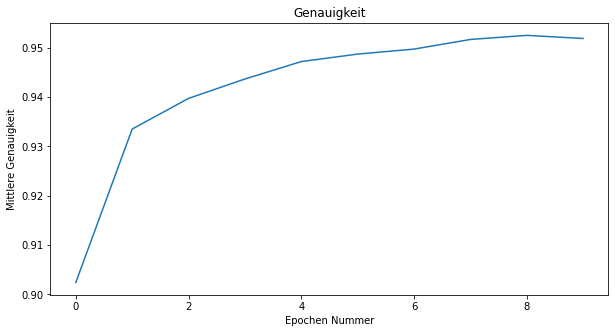

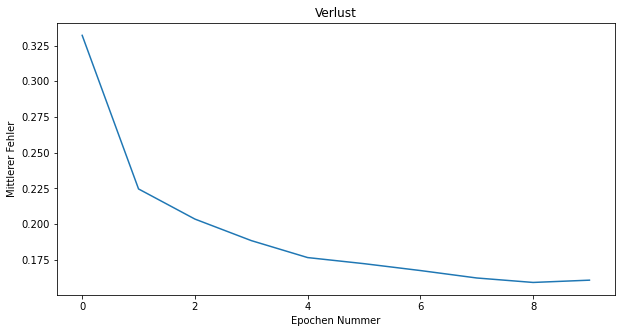

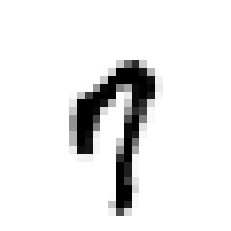

gesuchte Zahl:  7
 Zahl: 0  Erkennungsrate: 0.0
 Zahl: 1  Erkennungsrate: 0.0001
 Zahl: 2  Erkennungsrate: 0.0
 Zahl: 3  Erkennungsrate: 0.0
 Zahl: 4  Erkennungsrate: 0.1399
 Zahl: 5  Erkennungsrate: 0.0
 Zahl: 6  Erkennungsrate: 0.0
 Zahl: 7  Erkennungsrate: 0.6219
 Zahl: 8  Erkennungsrate: 0.0
 Zahl: 9  Erkennungsrate: 0.2377
313/313 [==============================] - 0s 1ms/step - loss: 0.1997 - accuracy: 0.9474
Verlust:  0.19969215989112854
Genauigkeit:  0.9473999738693237


In [ ]:
#Komplettes Programm

#Laden und normalisieren des Datensatzes
mnist = tf.keras.datasets.mnist
(trainZiffernBilder,trainZiffernLabels),(testZiffernBilder,testZiffernLabels) = mnist.load_data()

trainZiffernBilder = trainZiffernBilder /255
testZiffernBilder = testZiffernBilder / 255

#Erstellen des Models
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(16,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt,
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

#Training
verlauf = model.fit(trainZiffernBilder, trainZiffernLabels,64,10)

#Metriken visualisieren
plt.figure(figsize=(10,5))
plt.plot(verlauf.history['accuracy'])
plt.title('Genauigkeit')
plt.ylabel('Mittlere Genauigkeit')
plt.xlabel('Epochen Nummer')

plt.figure(figsize=(10,5))
plt.plot(verlauf.history['loss'], label='MAE (training data)')
plt.title('Verlust')
plt.ylabel('Mittlerer Fehler')
plt.xlabel('Epochen Nummer')
plt.show()

#Testen an zufälligem Bild
import random
randomIndexList = range(len(testZiffernBilder))
gesuchteZahlIndex = random.choice(randomIndexList)

erkennungsRaten = model.predict (testZiffernBilder[gesuchteZahlIndex:gesuchteZahlIndex+1])

flattendEr = erkennungsRaten.flatten() 
flattendTZLabels = testZiffernLabels.flatten()

#Ausgabe der gesuchten Zahl als Bild
imageArray = numpy.asfarray (testZiffernBilder[gesuchteZahlIndex:gesuchteZahlIndex+1]).reshape((28,28))
plt.imshow(imageArray, cmap='Greys',interpolation='None')
plt.axis('off')
plt.show()
print ("gesuchte Zahl: ",flattendTZLabels[gesuchteZahlIndex])

# Ausgabe der Erkennungsraten für die Zahlen 0..9
counter = 0
while counter < 10:
    readAbleErkennung = flattendEr[counter] * 10000
    readAbleErkennung = readAbleErkennung.astype(int)
    readAbleErkennung = readAbleErkennung / 10000
    print (" Zahl:", counter, " Erkennungsrate:",readAbleErkennung)
    counter = counter + 1

#Evaluation des Netzes
verlust, genauigkeit = model.evaluate(testZiffernBilder, testZiffernLabels)
print('Verlust: ', verlust)
print('Genauigkeit: ', genauigkeit)


# 8. Das Modell exportieren

Wir haben es geschafft, unser Netz ist trainiert und optimiert. Was wir jetzt tun können, ist es zu exportieren und in der "Wildnis" zu testen, also mit echten Daten! Lade dir dein Netz mit dem Button unten herunter.

In [ ]:
#@title
from google.colab import files
btn81 = Button(
    description='Starte',
    disabled=False,
    button_style='success', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Hier kannst du deine Lösung testen!',
    icon='check' # (FontAwesome names without the `fa-` prefix)
)

def checkLsg81(b):
  model.save('mnist_model.h5', save_format='h5')
  files.download('mnist_model.h5')

btn81.on_click(checkLsg81)
display(btn81)



Button(button_style='success', description='Starte', icon='check', style=ButtonStyle(), tooltip='Hier kannst d…